Random Forest Performance:
Accuracy: 0.8750
Precision: 0.8732
Recall: 0.8726
F1-Score: 0.8720

KNN (k=5):
Accuracy: 0.9425, Precision: 0.9404, Recall: 0.9414, F1: 0.9408
KNN (k=7):
Accuracy: 0.9550, Precision: 0.9533, Recall: 0.9549, F1: 0.9539
KNN (k=9):
Accuracy: 0.9550, Precision: 0.9531, Recall: 0.9543, F1: 0.9533
KNN (k=11):
Accuracy: 0.9500, Precision: 0.9482, Recall: 0.9501, F1: 0.9486
KNN (k=13):
Accuracy: 0.9500, Precision: 0.9481, Recall: 0.9496, F1: 0.9487
KNN (k=15):
Accuracy: 0.9450, Precision: 0.9428, Recall: 0.9442, F1: 0.9432
KNN (k=17):
Accuracy: 0.9525, Precision: 0.9509, Recall: 0.9528, F1: 0.9513
KNN (k=19):
Accuracy: 0.9475, Precision: 0.9457, Recall: 0.9474, F1: 0.9462
KNN (k=21):
Accuracy: 0.9425, Precision: 0.9406, Recall: 0.9419, F1: 0.9409

Best KNN Model:
k=7, Accuracy: 0.9550

Comparison:
Random Forest Accuracy: 0.8750
Best KNN Accuracy: 0.9550
Difference: -0.0800


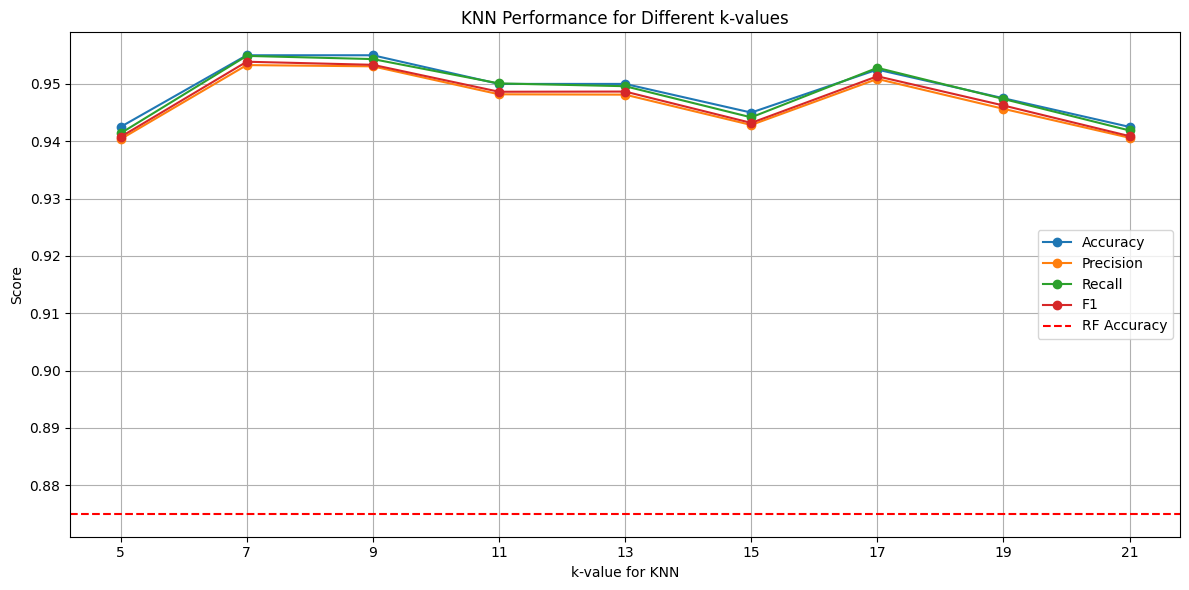

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/28-MobilePriceRange.csv')

# Separate features and target
X = data.drop('PriceRange', axis=1)
y = data['PriceRange']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print(f"Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}\n")

# Evaluate KNN for k from 5 to 21 (odd values)
k_values = range(5, 22, 2)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, knn_pred)
    precision = precision_score(y_test, knn_pred, average='macro')
    recall = recall_score(y_test, knn_pred, average='macro')
    f1 = f1_score(y_test, knn_pred, average='macro')

    results.append({
        'k': k,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

    print(f"KNN (k={k}):")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best KNN model
best_knn = results_df.loc[results_df['Accuracy'].idxmax()]

print("\nBest KNN Model:")
print(f"k={int(best_knn['k'])}, Accuracy: {best_knn['Accuracy']:.4f}")

# Compare with Random Forest
print("\nComparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Best KNN Accuracy: {best_knn['Accuracy']:.4f}")
print(f"Difference: {rf_accuracy - best_knn['Accuracy']:.4f}")

# Plot performance metrics
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for metric in metrics:
    plt.plot(results_df['k'], results_df[metric], marker='o', label=metric)

plt.axhline(y=rf_accuracy, color='r', linestyle='--', label='RF Accuracy')
plt.xlabel('k-value for KNN')
plt.ylabel('Score')
plt.title('KNN Performance for Different k-values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_performance.png', dpi=300)
plt.show()

In [ ]:
# ... (previous code remains unchanged until KNN evaluation section)

# Replace manual KNN evaluation with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(3, 31, 2)),  # Odd k-values from 3 to 29
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setup GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Utilize all CPU cores
)

# Execute grid search
grid_search.fit(X_train, y_train)

# Get best KNN model
best_knn = grid_search.best_estimator_
print("\nGridSearchCV Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set
knn_pred = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"Test Accuracy with Best KNN: {knn_accuracy:.4f}")

# Compare with Random Forest
print("\nFinal Model Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Optimized KNN Accuracy: {knn_accuracy:.4f}")
print(f"Performance Difference: {rf_accuracy - knn_accuracy:.4f}")

# Plotting remains unchanged
plt.figure(figsize=(12, 6))
# ... (rest of plotting code)


GridSearchCV Results:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best CV Accuracy: 0.9313
Test Accuracy with Best KNN: 0.9525

Final Model Comparison:
Random Forest Accuracy: 0.8750
Optimized KNN Accuracy: 0.9525
Performance Difference: -0.0775


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>


Model Comparison Report

Random Forest Best Parameters: n_estimators=100 (default)
KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Cross-Validation Accuracy (KNN): 0.9313

Performance Metrics Comparison:
           Random Forest  KNN (Optimized)  Difference (RF - KNN)
Accuracy        0.875000         0.952500              -0.077500
Precision       0.873241         0.950595              -0.077354
Recall          0.872614         0.952320              -0.079706
F1              0.872026         0.951065              -0.079040


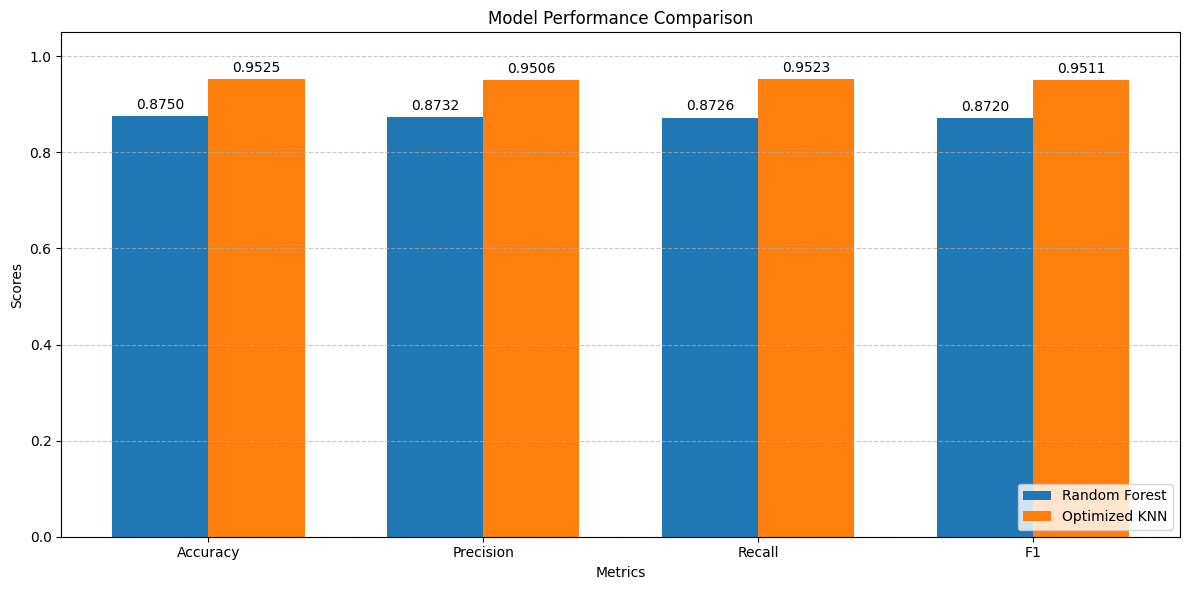


Statistical Significance Test (t-test):
t-statistic: -3.9369, p-value: 0.0001
Conclusion: The performance difference is statistically significant (p < 0.05)


In [ ]:
# ... (previous code up to Random Forest training)

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Calculate RF metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred, average='macro'),
    'Recall': recall_score(y_test, rf_pred, average='macro'),
    'F1': f1_score(y_test, rf_pred, average='macro')
}

# Hyperparameter tuning for KNN using GridSearchCV
param_grid = {
    'n_neighbors': list(range(3, 31, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best KNN model and metrics
best_knn = grid_search.best_estimator_
knn_pred = best_knn.predict(X_test)

knn_metrics = {
    'Accuracy': accuracy_score(y_test, knn_pred),
    'Precision': precision_score(y_test, knn_pred, average='macro'),
    'Recall': recall_score(y_test, knn_pred, average='macro'),
    'F1': f1_score(y_test, knn_pred, average='macro')
}

# Create comparison table
comparison_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'KNN (Optimized)': knn_metrics,
    'Difference (RF - KNN)': {
        'Accuracy': rf_metrics['Accuracy'] - knn_metrics['Accuracy'],
        'Precision': rf_metrics['Precision'] - knn_metrics['Precision'],
        'Recall': rf_metrics['Recall'] - knn_metrics['Recall'],
        'F1': rf_metrics['F1'] - knn_metrics['F1']
    }
})

print("\n" + "="*50)
print("Model Comparison Report")
print("="*50)
print(f"\nRandom Forest Best Parameters: n_estimators=100 (default)")
print(f"KNN Best Parameters: {grid_search.best_params_}")
print(f"\nCross-Validation Accuracy (KNN): {grid_search.best_score_:.4f}")

print("\nPerformance Metrics Comparison:")
print(comparison_df)

# Visual comparison using bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rf_bars = ax.bar(x - width/2, [rf_metrics[m] for m in metrics], width, label='Random Forest', color='#1f77b4')
knn_bars = ax.bar(x + width/2, [knn_metrics[m] for m in metrics], width, label='Optimized KNN', color='#ff7f0e')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.05)

# Add values on top of bars
for bars in [rf_bars, knn_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

# Statistical significance test
from scipy.stats import ttest_ind

# Compare predictions at instance level
rf_correct = (rf_pred == y_test).astype(int)
knn_correct = (knn_pred == y_test).astype(int)

t_stat, p_value = ttest_ind(rf_correct, knn_correct)
print(f"\nStatistical Significance Test (t-test):")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: The performance difference is statistically significant (p < 0.05)")
else:
    print("Conclusion: The performance difference is not statistically significant (p >= 0.05)")

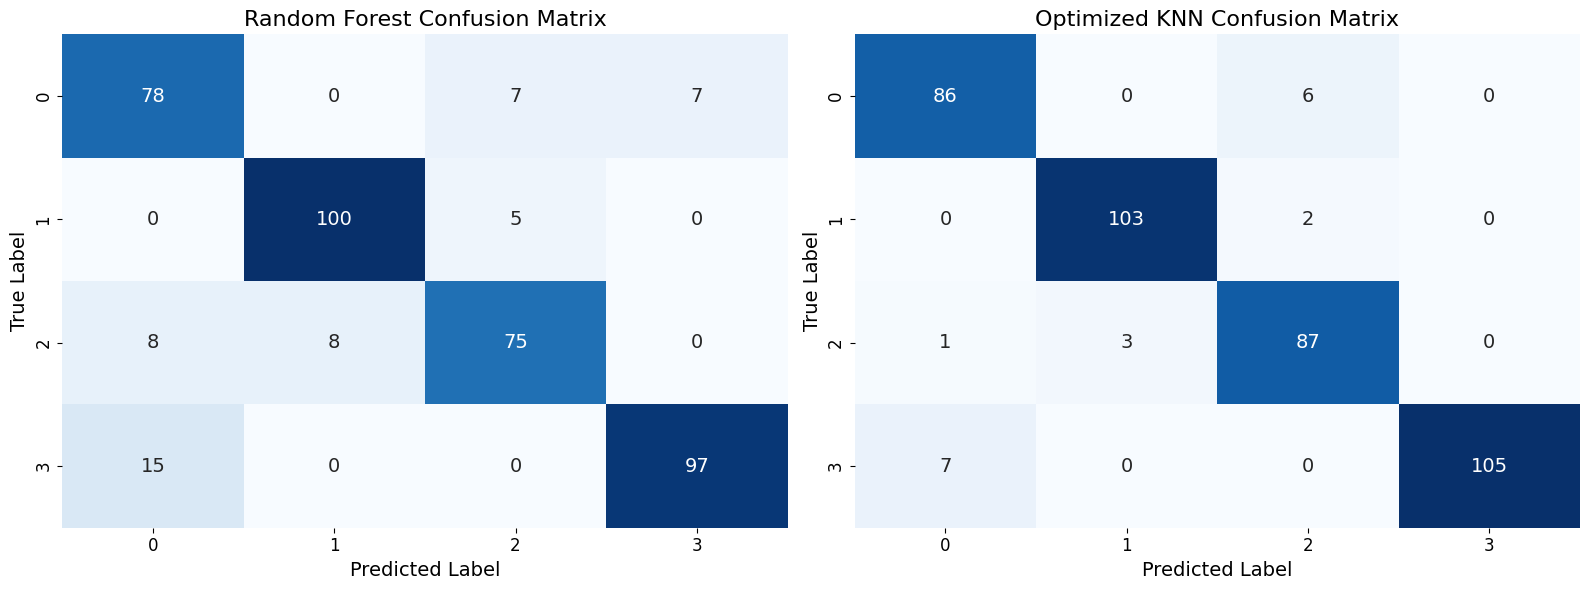


Classification Report - Random Forest
              precision    recall  f1-score   support

     Class 0       0.77      0.85      0.81        92
     Class 1       0.93      0.95      0.94       105
     Class 2       0.86      0.82      0.84        91
     Class 3       0.93      0.87      0.90       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400


Classification Report - Optimized KNN
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92        92
     Class 1       0.97      0.98      0.98       105
     Class 2       0.92      0.96      0.94        91
     Class 3       1.00      0.94      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


Per-Class Performance Comparison
     Class  RF Acc

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_f

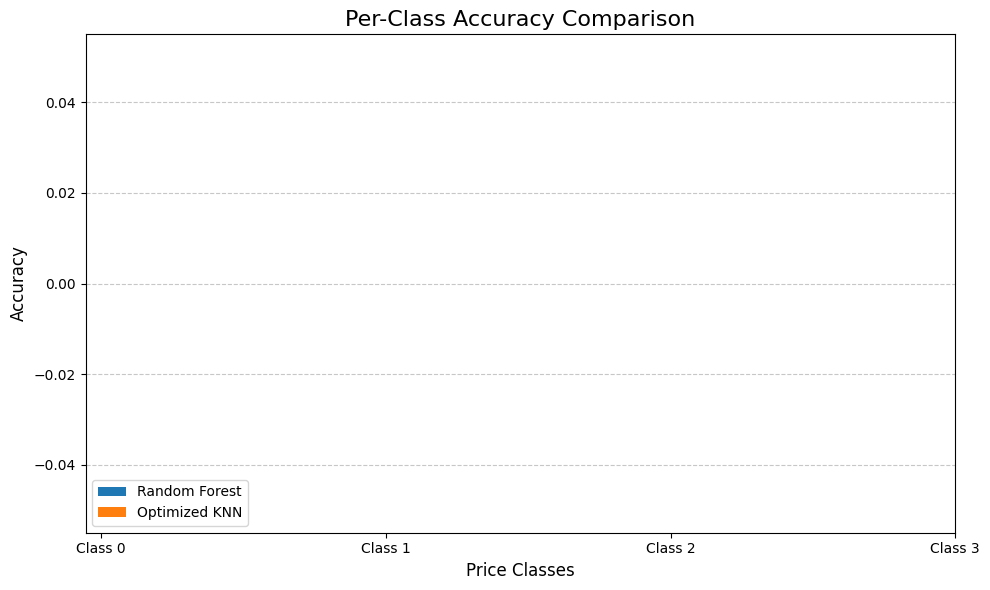

In [ ]:
# ... (previous code up to model comparison)

# Add confusion matrices and classification reports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, annot_kws={'size': 14})
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=16)
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    ax.set_xticklabels(['0', '1', '2', '3'], fontsize=12)
    ax.set_yticklabels(['0', '1', '2', '3'], fontsize=12)

# Create figure for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Random Forest confusion matrix
plot_confusion_matrix(y_test, rf_pred, "Random Forest", axes[0])

# Plot KNN confusion matrix
plot_confusion_matrix(y_test, knn_pred, "Optimized KNN", axes[1])

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300)
plt.show()

# Print classification reports
print("\n" + "="*50)
print("Classification Report - Random Forest")
print("="*50)
print(classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

print("\n" + "="*50)
print("Classification Report - Optimized KNN")
print("="*50)
print(classification_report(y_test, knn_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

# Detailed comparison per class
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
class_comparison = []

for i, class_name in enumerate(class_names):
    # Get indices for current class
    class_idx = y_test == i

    # Calculate class-specific metrics
    rf_acc = accuracy_score(y_test[class_idx], rf_pred[class_idx])
    knn_acc = accuracy_score(y_test[class_idx], knn_pred[class_idx])

    rf_prec = precision_score(y_test, rf_pred, average=None)[i]
    knn_prec = precision_score(y_test, knn_pred, average=None)[i]

    rf_rec = recall_score(y_test, rf_pred, average=None)[i]
    knn_rec = recall_score(y_test, knn_pred, average=None)[i]

    class_comparison.append({
        'Class': class_name,
        'RF Accuracy': rf_acc,
        'KNN Accuracy': knn_acc,
        'RF Precision': rf_prec,
        'KNN Precision': knn_prec,
        'RF Recall': rf_rec,
        'KNN Recall': knn_rec
    })

# Create DataFrame for class comparison
class_df = pd.DataFrame(class_comparison)

print("\n" + "="*50)
print("Per-Class Performance Comparison")
print("="*50)
print(class_df)

# Plot per-class accuracy comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, class_df['RF Accuracy'], width, label='Random Forest')
plt.bar(x + width/2, class_df['KNN Accuracy'], width, label='Optimized KNN')

plt.xlabel('Price Classes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Class Accuracy Comparison', fontsize=16)
plt.xticks(x, class_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for i, v in enumerate(class_df['RF Accuracy']):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center')

for i, v in enumerate(class_df['KNN Accuracy']):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.savefig('class_accuracy_comparison.png', dpi=300)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ran

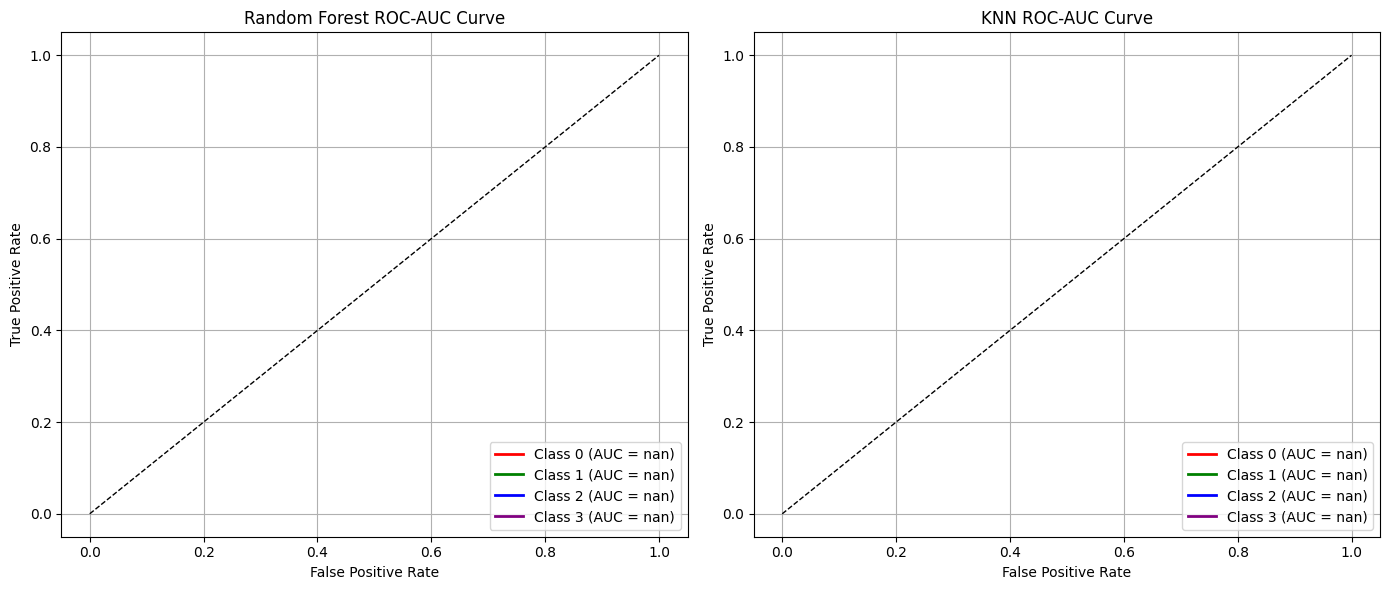

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Binarize target for ROC-AUC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Step 2: Use OneVsRestClassifier to get probability scores
# For Random Forest
rf_ovr = OneVsRestClassifier(rf)
rf_ovr.fit(X_train, y_train)
y_score_rf = rf_ovr.predict_proba(X_test)

# For KNN
knn_ovr = OneVsRestClassifier(best_knn)
knn_ovr.fit(X_train, y_train)
y_score_knn = knn_ovr.predict_proba(X_test)

# Step 3: Calculate ROC and AUC for each class
fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
fpr_knn, tpr_knn, roc_auc_knn = {}, {}, {}

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Step 4: Plot ROC curves
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
colors = ['red', 'green', 'blue', 'purple']

plt.figure(figsize=(14, 6))

# Random Forest ROC Curve
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc_rf[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('Random Forest ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# KNN ROC Curve
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc_knn[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('KNN ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.savefig('roc_auc_multiclass.png', dpi=300)
plt.show()


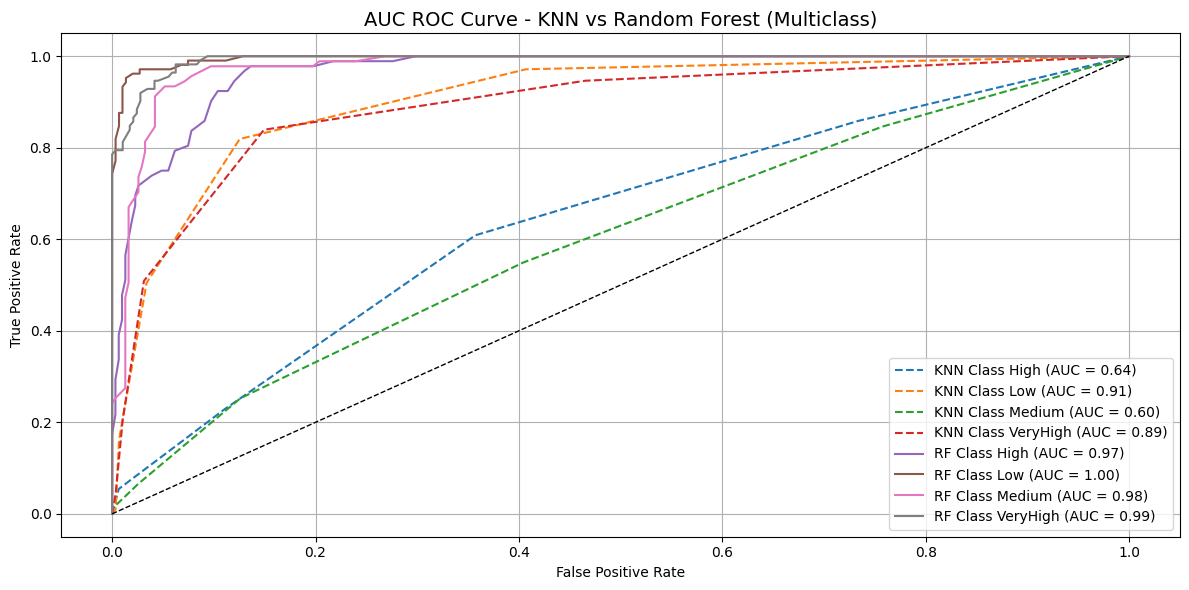

In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    roc_auc_score, roc_curve, auc
)

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv('28-MobilePriceRange.csv')  # or your full path

# Encode target variable
le = LabelEncoder()
df['PriceRange'] = le.fit_transform(df['PriceRange'])

# Split features and target
X = df.drop('PriceRange', axis=1)
y = df['PriceRange']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Binarize labels for ROC Curve (multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# ===============================
# 3. KNN Classifier
# ===============================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_probs = knn.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], knn_probs[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# ===============================
# 4. Random Forest Classifier
# ===============================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# ===============================
# 5. Plot ROC Curves
# ===============================
plt.figure(figsize=(12, 6))

# KNN ROC
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], linestyle='--', label=f'KNN Class {le.classes_[i]} (AUC = {roc_auc_knn[i]:.2f})')

# RF ROC
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], linestyle='-', label=f'RF Class {le.classes_[i]} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('AUC ROC Curve - KNN vs Random Forest (Multiclass)', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the dataset
df = pd.read_csv('28-MobilePriceRange.csv')

# Encode the target variable
le = LabelEncoder()
df['PriceRange'] = le.fit_transform(df['PriceRange'])

# Map numerical labels to original categories for reference
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("Label Mapping:", label_mapping)

# Separate features and target
X = df.drop('PriceRange', axis=1)
y = df['PriceRange']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate KNN
print("\n" + "="*40)
print("KNN MODEL EVALUATION")
print("="*40)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)

# Calculate metrics for KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_mapping.values())
auc_knn = roc_auc_score(
    label_binarize(y_test, classes=np.unique(y)),
    y_proba_knn,
    multi_class='ovr'
)

print(f"Accuracy: {acc_knn:.4f}")
print(f"AUC-ROC: {auc_knn:.4f}")
print("\nClassification Report:")
print(report_knn)

# Train and evaluate Random Forest
print("\n" + "="*40)
print("RANDOM FOREST MODEL EVALUATION")
print("="*40)
rf.fit(X_train, y_train)  # RF doesn't require scaling
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)

# Calculate metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=label_mapping.values())
auc_rf = roc_auc_score(
    label_binarize(y_test, classes=np.unique(y)),
    y_proba_rf,
    multi_class='ovr'
)

print(f"Accuracy: {acc_rf:.4f}")
print(f"AUC-ROC: {auc_rf:.4f}")
print("\nClassification Report:")
print(report_rf)

# Feature importance from Random Forest
print("\nTop 10 Important Features from Random Forest:")
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))

Label Mapping: {np.int64(0): 'High', np.int64(1): 'Low', np.int64(2): 'Medium', np.int64(3): 'VeryHigh'}

KNN MODEL EVALUATION
Accuracy: 0.5000
AUC-ROC: 0.7558

Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.50      0.41       148
         Low       0.69      0.69      0.69       151
      Medium       0.37      0.35      0.36       146
    VeryHigh       0.73      0.46      0.56       155

    accuracy                           0.50       600
   macro avg       0.53      0.50      0.51       600
weighted avg       0.54      0.50      0.51       600


RANDOM FOREST MODEL EVALUATION
Accuracy: 0.8567
AUC-ROC: 0.9733

Classification Report:
              precision    recall  f1-score   support

        High       0.77      0.75      0.76       148
         Low       0.94      0.96      0.95       151
      Medium       0.81      0.84      0.82       146
    VeryHigh       0.91      0.88      0.89       155

    accuracy        

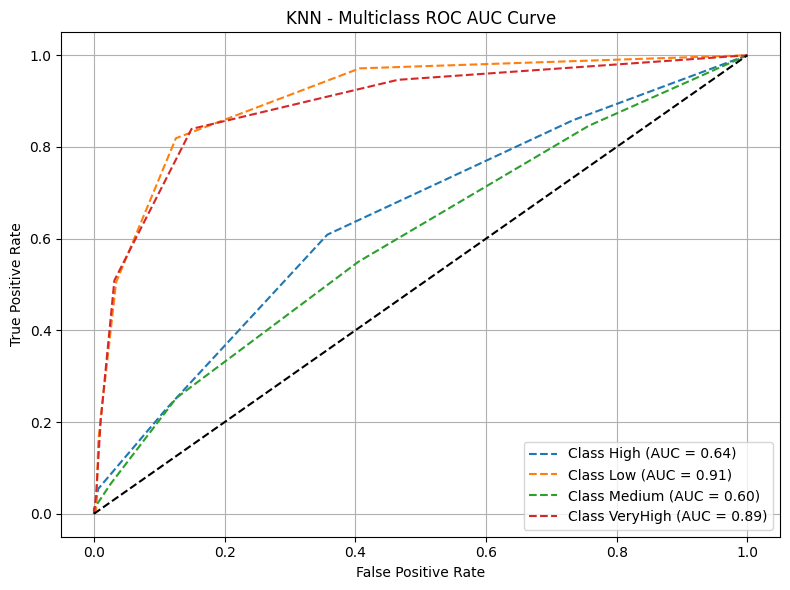

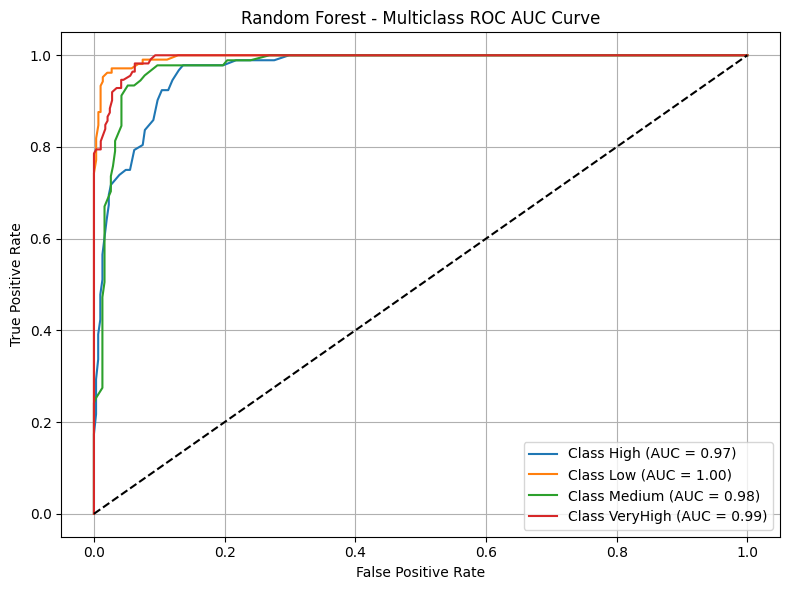

In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# ===============================
# 2. Load and Preprocess Dataset
# ===============================
df = pd.read_csv('28-MobilePriceRange.csv')  # Use full path if needed

# Encode target
le = LabelEncoder()
df['PriceRange'] = le.fit_transform(df['PriceRange'])

# Features and Target
X = df.drop('PriceRange', axis=1)
y = df['PriceRange']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Binarize y for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# ===============================
# 3. KNN Classifier
# ===============================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_probs = knn.predict_proba(X_test)

# KNN ROC Curve data
fpr_knn = {}
tpr_knn = {}
roc_auc_knn = {}
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], knn_probs[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# ===============================
# 4. Random Forest Classifier
# ===============================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

# RF ROC Curve data
fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# ===============================
# 5. Plot KNN ROC Curve
# ===============================
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_knn[i]:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('KNN - Multiclass ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 6. Plot Random Forest ROC Curve
# ===============================
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_rf[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest - Multiclass ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
